## DATASET INFORMATION

## IMPORTING LIBRARIES

In [228]:
import os

import pandas as pd
import numpy as np

import nltk          # natural language toolkit
from nltk import sent_tokenize, word_tokenize
import nltk.corpus
from nltk.corpus import stopwords
import re            # regular expression, find particular phrases and replace
import string        # to get information in the string, pre-processing

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## LOADING THE DATASET

In [229]:
import os
os.chdir(r'C:\Users\errin\OneDrive\Documents\Python Project (Mr.Kumar)\Project')
os.getcwd()

'C:\\Users\\errin\\OneDrive\\Documents\\Python Project (Mr.Kumar)\\Project'

In [230]:
import pandas as pd

train = pd.read_table(r'train.txt', header=None, sep=';', names = ['Review', 'Emotion'])
test  = pd.read_table(r'test.txt', header=None, sep=';', names = ['Review', 'Emotion'])
val   = pd.read_table(r'val.txt', header=None, sep=';', names = ['Review', 'Emotion']) 

### COMBINING TRAIN AND TEST DATASET

In [231]:
# CONCATENATE TRAIN AND TEST DATASET

train['Source'] = 'train'
test['Source'] = 'test'

df = pd.concat([train, test], ignore_index=True)
train.shape, test.shape, df.shape


((16000, 3), (2000, 3), (18000, 3))

In [5]:
df.head()

Review  Emotion Source
0                            i didnt feel humiliated  sadness  train
1  i can go from feeling so hopeless to so damned...  sadness  train
2   im grabbing a minute to post i feel greedy wrong    anger  train
3  i am ever feeling nostalgic about the fireplac...     love  train
4                               i am feeling grouchy    anger  train

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Review   18000 non-null  object
 1   Emotion  18000 non-null  object
 2   Source   18000 non-null  object
dtypes: object(3)
memory usage: 422.0+ KB


In [7]:
df.describe()

Review Emotion Source
count                              18000   18000  18000
unique                             17958       6      2
top     i still feel completely accepted     joy  train
freq                                   2    6057  16000

In [8]:
df.describe().transpose()

count unique                               top   freq
Review   18000  17958  i still feel completely accepted      2
Emotion  18000      6                               joy   6057
Source   18000      2                             train  16000

In [9]:
df['Emotion'].value_counts()

joy         6057
sadness     5247
anger       2434
fear        2161
love        1463
surprise     638
Name: Emotion, dtype: int64

In [10]:
df.keys()

Index(['Review', 'Emotion', 'Source'], dtype='object')

In [11]:
df.values

array([['i didnt feel humiliated', 'sadness', 'train'],
       ['i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
        'sadness', 'train'],
       ['im grabbing a minute to post i feel greedy wrong', 'anger',
        'train'],
       ...,
       ['i feel that i am useful to my people and that gives me a great feeling of achievement',
        'joy', 'test'],
       ['im feeling more comfortable with derby i feel as though i can start to step out my shell',
        'joy', 'test'],
       ['i feel all weird when i have to meet w people i text but like dont talk face to face w',
        'fear', 'test']], dtype=object)

# VISUALIZATION

Text(0.5, 1, 'Bar chart for Emotion')

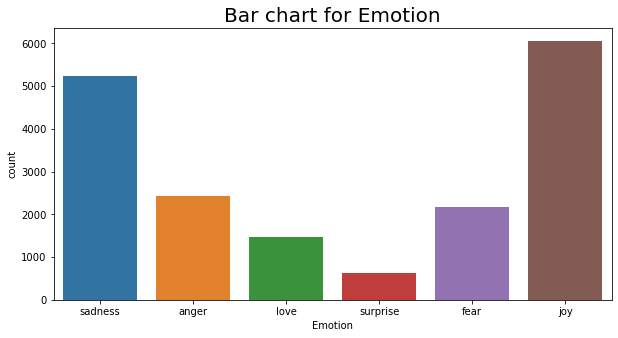

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
sns.countplot(df['Emotion'])
plt.title("Bar chart for Emotion", y=1, fontdict={"fontsize": 20})

([<matplotlib.patches.Wedge at 0x27dc6934310>,
 [Text(0.5896318593546762, 1.0451479658086444, 'Joy'),
  Text(-1.0931660873147468, 0.12242510177642235, 'Sadness'),
  Text(-0.3686350240600918, -1.0363919234711432, 'Anger'),
  Text(0.4885827105687864, -0.9855389058445423, 'Fear'),
  Text(0.9766852522313044, -0.5060493237559689, 'Love'),
  Text(1.0931874449129313, -0.12223424350294372, 'Surprise')],
 [Text(0.34395191795689445, 0.6096696467217091, '33.6%'),
  Text(-0.5962724112625891, 0.0667773282416849, '29.2%'),
  Text(-0.2010736494873228, -0.5653046855297144, '13.5%'),
  Text(0.2664996603102471, -0.5375666759152048, '12.0%'),
  Text(0.5327374103079842, -0.2760269038668921, '8.1%'),
  Text(0.5962840608615988, -0.06667322372887838, '3.5%')])

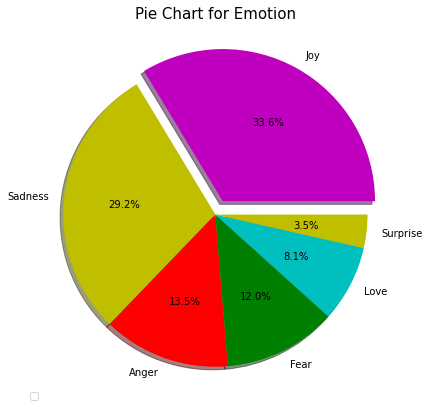

In [233]:
plt.figure(figsize = (10,7))
Emotion=df['Emotion'].value_counts()
values = [Emotion[0],Emotion[1],Emotion[2],Emotion[3],Emotion[4],Emotion[5]]
colors = ['m', 'y','r','g','c','y']
labels = ['Joy','Sadness','Anger','Fear','Love','Surprise']
explode = (0.1, 0, 0, 0, 0, 0)
plt.title('Pie Chart for Emotion', y=1, fontdict={"fontsize": 15})
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)

# PRE-PROCESSING

#### Different data and function

print(os.listdir(nltk.data.find('corpora')))

### Common Data Cleaning Steps on all Text:

    1. Make sure all Lower Case
    2. Remove Punctuation
    3. Remove Numerical Values
    4. Remove Common Non-Sensical text (/n)
    5. Tokenize Text
    6. Remove Stopwords

### More Data Cleaning Steps after Tokenization:
    
    1. Stemming / Lemmatization
    2. Parts Of Speech Tagging
    3. Create Bi-grams or Tri-grams
    4. Deal with Typos
    5. And more...

## 1. PRE-PROCESSING (COMMON DATA CLEANING)

In [12]:
# df_original = df.copy()

In [234]:
df_prep = df.copy()

In [235]:
df_clean = df_prep.copy()
df_clean.head()

Review  Emotion Source
0                            i didnt feel humiliated  sadness  train
1  i can go from feeling so hopeless to so damned...  sadness  train
2   im grabbing a minute to post i feel greedy wrong    anger  train
3  i am ever feeling nostalgic about the fireplac...     love  train
4                               i am feeling grouchy    anger  train

### 1.1 Apply a First Round of Cleaning

In [236]:
# Make text lowercase, remove text in square brackets, remove punctuation and remove words

import re
import string

def clean_text_round1(text):
    text = text.lower()                                                # make all the letters in lower cap
    text = re.sub ('\[.*?\]', '', text)                                # anything inside the bracket
    text = re.sub ('[%s]'% re.escape(string.punctuation),'', text)     # punctuation marks
    text = re.sub ('\w*\d\w*', '', text)                               # any letters that contains a number
    return text

# round1 = lambda x:clean_text_round1(x)
#df_prep['Clean_Review'] = df_prep['Review'].apply(round1)

In [237]:
df_clean['Clean_Review'] = pd.DataFrame(df_clean.Review.apply(lambda x:clean_text_round1(x)))
df_clean.head()

Review  Emotion Source  \
0                            i didnt feel humiliated  sadness  train   
1  i can go from feeling so hopeless to so damned...  sadness  train   
2   im grabbing a minute to post i feel greedy wrong    anger  train   
3  i am ever feeling nostalgic about the fireplac...     love  train   
4                               i am feeling grouchy    anger  train   

                                        Clean_Review  
0                            i didnt feel humiliated  
1  i can go from feeling so hopeless to so damned...  
2   im grabbing a minute to post i feel greedy wrong  
3  i am ever feeling nostalgic about the fireplac...  
4                               i am feeling grouchy

### 1.2 Apply a Second Round of Cleaning

In [238]:
# Get rid of some additional punctuation and non-sensical text that was missed from the first round

def clean_text_round2(text):
    text = re.sub ('[''""...]', '', text)
    text = re.sub ('\n', '', text)
    return text
round2 = lambda x: clean_text_round1(x)

In [239]:
df_clean['Clean_Review'] = pd.DataFrame(df_clean.Clean_Review.apply(round2))
df_clean.head()

Review  Emotion Source  \
0                            i didnt feel humiliated  sadness  train   
1  i can go from feeling so hopeless to so damned...  sadness  train   
2   im grabbing a minute to post i feel greedy wrong    anger  train   
3  i am ever feeling nostalgic about the fireplac...     love  train   
4                               i am feeling grouchy    anger  train   

                                        Clean_Review  
0                            i didnt feel humiliated  
1  i can go from feeling so hopeless to so damned...  
2   im grabbing a minute to post i feel greedy wrong  
3  i am ever feeling nostalgic about the fireplac...  
4                               i am feeling grouchy

In [240]:
# for w in x.split() if len(w)>3 iterating through the string, split all the words
# if the len of word is greater than 3 means i will add it to the  " "(string) otherwise ignore it

df_clean["Clean_Review"] = df_clean["Clean_Review"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df_clean.head()

Review  Emotion Source  \
0                            i didnt feel humiliated  sadness  train   
1  i can go from feeling so hopeless to so damned...  sadness  train   
2   im grabbing a minute to post i feel greedy wrong    anger  train   
3  i am ever feeling nostalgic about the fireplac...     love  train   
4                               i am feeling grouchy    anger  train   

                                        Clean_Review  
0                              didnt feel humiliated  
1  from feeling hopeless damned hopeful just from...  
2             grabbing minute post feel greedy wrong  
3  ever feeling nostalgic about fireplace will kn...  
4                                    feeling grouchy

### PICKLE ("CORPUS")

### COUNTVECTORIZER USING STOP WORDS

## 2. PRE-PROCESSING (NLP)

1. TOKENIZATION - splits text into pieces (tokens),  remove punctuation.
2. STEMMING AND LEMMATIZATION - reduces words to base form to be analyzed as a single item.
3. P.O.S TAGGING - tags words to be part of speech (such as noun, verb) based on definition and context.
4. INFORMATION RETRIEVAL -  extracts relevant  information form source.

### 2.1 TOKENIZATION
1. Break a complex sentence into words (tokens)
2. Understand the importance of each of the words with respect to the sentence
3. Produce a structural description on an input sentence

In [241]:
# individual words considered as tokens

df_tokenize = df_clean["Clean_Review"].apply(lambda x: x.split())
df_tokenize.head()

0                            [didnt, feel, humiliated]
1    [from, feeling, hopeless, damned, hopeful, jus...
2        [grabbing, minute, post, feel, greedy, wrong]
3    [ever, feeling, nostalgic, about, fireplace, w...
4                                   [feeling, grouchy]
Name: Clean_Review, dtype: object

### 2.2 STOPWORDS

In [242]:
stop_words = set(stopwords.words('english'))

df_stopwords = df_tokenize.apply(lambda sentence: [word for word in sentence if word not in stop_words])

df_stopwords.head()

0                            [didnt, feel, humiliated]
1    [feeling, hopeless, damned, hopeful, around, s...
2        [grabbing, minute, post, feel, greedy, wrong]
3    [ever, feeling, nostalgic, fireplace, know, st...
4                                   [feeling, grouchy]
Name: Clean_Review, dtype: object

In [243]:
df_stopwords[:5]

0                            [didnt, feel, humiliated]
1    [feeling, hopeless, damned, hopeful, around, s...
2        [grabbing, minute, post, feel, greedy, wrong]
3    [ever, feeling, nostalgic, fireplace, know, st...
4                                   [feeling, grouchy]
Name: Clean_Review, dtype: object

### 2.3 STEMMING and LEMMATIZATION WILL BE DONE LATER

### COMBINING PRE-PROCESS WORDS

In [244]:
df_stopwords_comb = df_stopwords.copy() 

In [245]:
for i in range (len(df_stopwords)):
    df_stopwords_comb[i] = " ".join(df_stopwords_comb[i])   # this line will combine all individual words into a single sentence
    
df_clean['Clean_Review'] = df_stopwords_comb             #  Combine them in the clean_review
df_clean.head()

Review  Emotion Source  \
0                            i didnt feel humiliated  sadness  train   
1  i can go from feeling so hopeless to so damned...  sadness  train   
2   im grabbing a minute to post i feel greedy wrong    anger  train   
3  i am ever feeling nostalgic about the fireplac...     love  train   
4                               i am feeling grouchy    anger  train   

                                        Clean_Review  
0                              didnt feel humiliated  
1  feeling hopeless damned hopeful around someone...  
2             grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy

## COMBINING ALL REVIEWS INTO ONE LIST

In [246]:
df_sentence = list(map(str, df_clean['Clean_Review']))
print(df_sentence)

['didnt feel humiliated', 'feeling hopeless damned hopeful around someone cares awake', 'grabbing minute post feel greedy wrong', 'ever feeling nostalgic fireplace know still property', 'feeling grouchy', 'feeling little burdened lately wasnt sure', 'taking milligrams times recommended amount fallen asleep faster also feel like funny', 'feel confused life teenager jaded year', 'petronas years feel petronas performed well made huge profit', 'feel romantic', 'feel like make suffering seeing mean something', 'feel running divine experience expect type spiritual encounter', 'think easiest time year feel dissatisfied', 'feel energy thirsty', 'immense sympathy general point possible proto writer trying find time write corners life sign agent alone publishing contract feels little precious', 'feel reassured anxiety side', 'didnt really feel embarrassed', 'feel pretty pathetic time', 'started feeling sentimental dolls child began collection vintage barbie dolls sixties', 'feel compromised skep

## JOINING ALL REVIEWS INTO ONE STRING

In [247]:
df_wordcloud = " ".join([sentence for sentence in df_clean['Clean_Review']])
df_wordcloud

'didnt feel humiliated feeling hopeless damned hopeful around someone cares awake grabbing minute post feel greedy wrong ever feeling nostalgic fireplace know still property feeling grouchy feeling little burdened lately wasnt sure taking milligrams times recommended amount fallen asleep faster also feel like funny feel confused life teenager jaded year petronas years feel petronas performed well made huge profit feel romantic feel like make suffering seeing mean something feel running divine experience expect type spiritual encounter think easiest time year feel dissatisfied feel energy thirsty immense sympathy general point possible proto writer trying find time write corners life sign agent alone publishing contract feels little precious feel reassured anxiety side didnt really feel embarrassed feel pretty pathetic time started feeling sentimental dolls child began collection vintage barbie dolls sixties feel compromised skeptical value every unit work feel irritated rejected withou

## CREATING A WORDCLOUD OF ALL WORDS IN THE CLEAN_REVIEW DATAFRAME

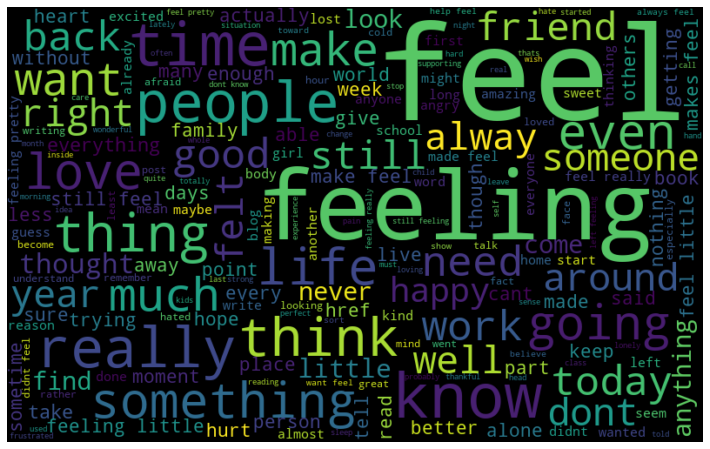

In [248]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=150).generate(df_wordcloud)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [249]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words2 = set(stopwords.words('english'))
word_tokens = word_tokenize(df_wordcloud)

filtered_sentence = [word for word in word_tokens if not word.lower() in stop_words2]
filtered_sentence = []

for word in word_tokens:
    if word not in stop_words2:
        filtered_sentence.append(word)
        

In [250]:
print(word_tokens)

['didnt', 'feel', 'humiliated', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong', 'ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property', 'feeling', 'grouchy', 'feeling', 'little', 'burdened', 'lately', 'wasnt', 'sure', 'taking', 'milligrams', 'times', 'recommended', 'amount', 'fallen', 'asleep', 'faster', 'also', 'feel', 'like', 'funny', 'feel', 'confused', 'life', 'teenager', 'jaded', 'year', 'petronas', 'years', 'feel', 'petronas', 'performed', 'well', 'made', 'huge', 'profit', 'feel', 'romantic', 'feel', 'like', 'make', 'suffering', 'seeing', 'mean', 'something', 'feel', 'running', 'divine', 'experience', 'expect', 'type', 'spiritual', 'encounter', 'think', 'easiest', 'time', 'year', 'feel', 'dissatisfied', 'feel', 'energy', 'thirsty', 'immense', 'sympathy', 'general', 'point', 'possible', 'proto', 'writer', 'trying', 'find', 'time', 'write', 'corners', 'life', 'sign', 'agent

In [251]:
print(filtered_sentence)

['didnt', 'feel', 'humiliated', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong', 'ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property', 'feeling', 'grouchy', 'feeling', 'little', 'burdened', 'lately', 'wasnt', 'sure', 'taking', 'milligrams', 'times', 'recommended', 'amount', 'fallen', 'asleep', 'faster', 'also', 'feel', 'like', 'funny', 'feel', 'confused', 'life', 'teenager', 'jaded', 'year', 'petronas', 'years', 'feel', 'petronas', 'performed', 'well', 'made', 'huge', 'profit', 'feel', 'romantic', 'feel', 'like', 'make', 'suffering', 'seeing', 'mean', 'something', 'feel', 'running', 'divine', 'experience', 'expect', 'type', 'spiritual', 'encounter', 'think', 'easiest', 'time', 'year', 'feel', 'dissatisfied', 'feel', 'energy', 'thirsty', 'immense', 'sympathy', 'general', 'point', 'possible', 'proto', 'writer', 'trying', 'find', 'time', 'write', 'corners', 'life', 'sign', 'agent

## COLLECTING THE MOST COMMON WORDS: Using COUNTER

In [252]:
# Most Common Words Without Stemming and Lemmatization
from collections import Counter
Counter = Counter(word_tokens)

most_occur = Counter.most_common(10)
print(most_occur)

[('feel', 12577), ('feeling', 5758), ('like', 3281), ('really', 1060), ('know', 955), ('time', 894), ('little', 831), ('people', 750), ('would', 721), ('want', 716)]


## COLLECTING THE MOST COMMON WORDS: Using FREQDIST

In [253]:
from nltk.probability import FreqDist
fdist = FreqDist()

for word in word_tokens:
    fdist[word.lower()]+=1
fdist

FreqDist({'feel': 12577, 'feeling': 5758, 'like': 3281, 'really': 1060, 'know': 955, 'time': 894, 'little': 831, 'people': 750, 'would': 721, 'want': 716, ...})

### SHOWING THE TOP 10 MOST COMMON WORDS

In [254]:
freq =nltk.FreqDist(word_tokens)
df_freq = pd.DataFrame({'Words': list(freq.keys()),
                       'Count': list(freq.values())})
df_freq = df_freq.sort_values("Count", ascending = False).head(10)
df_freq

Words  Count
1       feel  12577
3    feeling   5758
37      like   3281
91    really   1060
19      know    955
66      time    894
23    little    831
160   people    750
213    would    721
232     want    716

## ANALYSIS FOR EVERY EMOTION USING WORDCLOUD

### 1. EMOTION = JOY

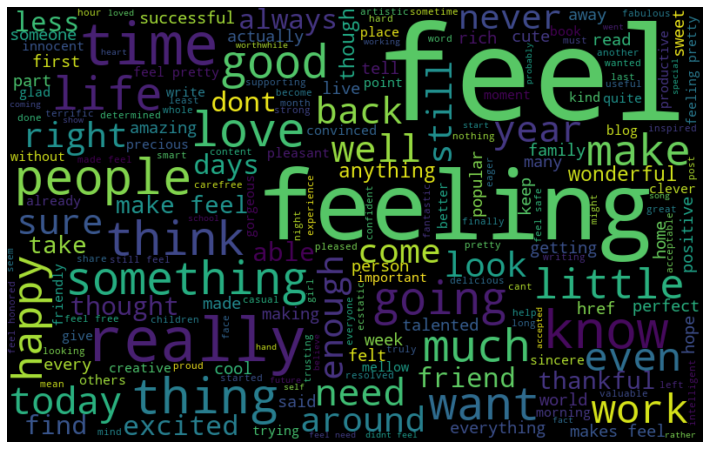

In [255]:
df_wordcloud_joy = " ".join([sentence for sentence in df_clean['Clean_Review'][df['Emotion']=='joy']])

wordcloud_joy = WordCloud(width=800, height=500, random_state=42, max_font_size=150).generate(df_wordcloud_joy)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_joy, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 2. EMOTION = SADNESS

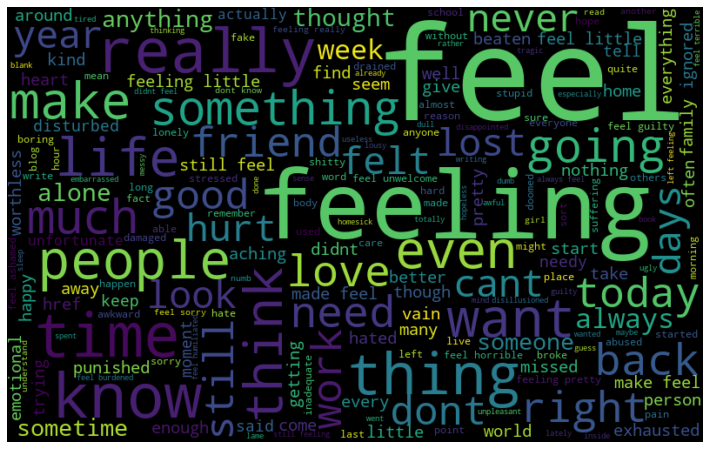

In [256]:
df_wordcloud_sadness = " ".join([sentence for sentence in df_clean['Clean_Review'][df['Emotion']=='sadness']])

wordcloud_sadness = WordCloud(width=800, height=500, random_state=42, max_font_size=150).generate(df_wordcloud_sadness)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_sadness, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 3. EMOTION = ANGER

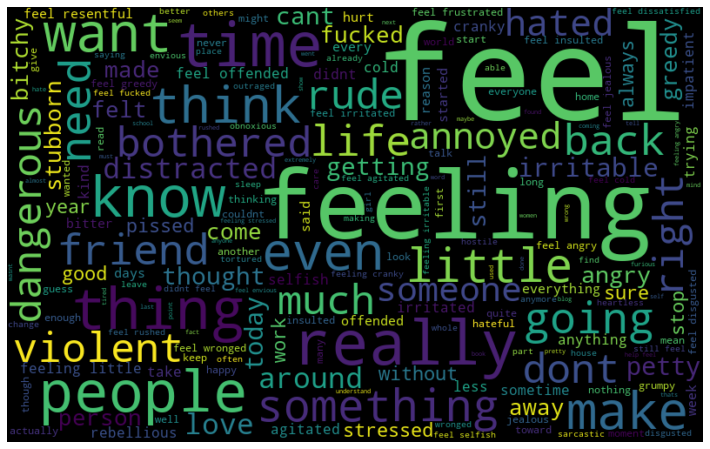

In [257]:
df_wordcloud_anger = " ".join([sentence for sentence in df_clean['Clean_Review'][df['Emotion']=='anger']])

wordcloud_anger = WordCloud(width=800, height=500, random_state=42, max_font_size=150).generate(df_wordcloud_anger)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_anger, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 4. EMOTION = FEAR

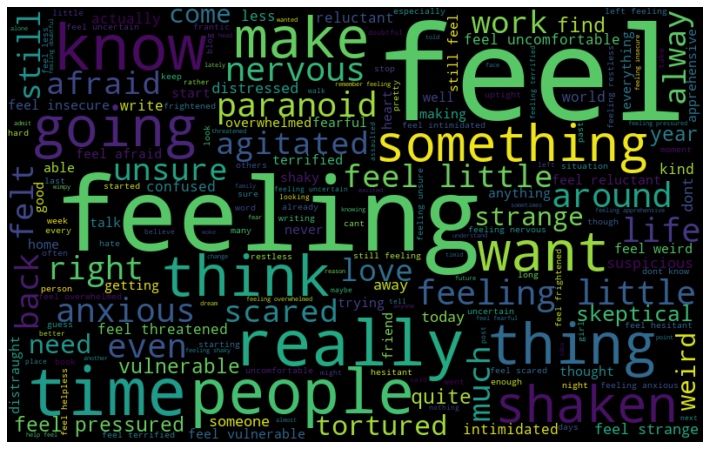

In [258]:
df_wordcloud_fear = " ".join([sentence for sentence in df_clean['Clean_Review'][df['Emotion']=='fear']])

wordcloud_fear = WordCloud(width=800, height=500, random_state=42, max_font_size=150).generate(df_wordcloud_fear)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_fear, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 5. EMOTION = LOVE

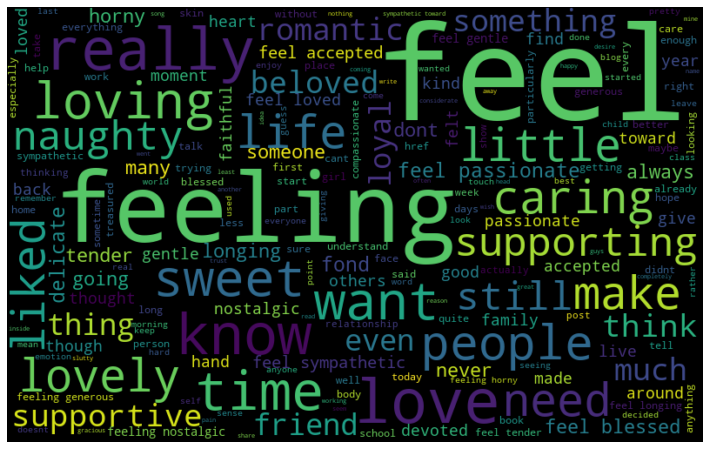

In [259]:
df_wordcloud_love = " ".join([sentence for sentence in df_clean['Clean_Review'][df['Emotion']=='love']])

wordcloud_love = WordCloud(width=800, height=500, random_state=42, max_font_size=150).generate(df_wordcloud_love)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_love, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 6. EMOTION = SURPRISE

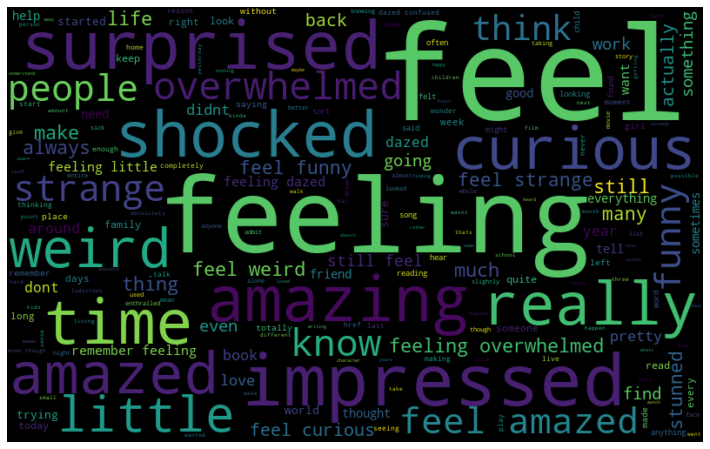

In [260]:
df_wordcloud_surprise = " ".join([sentence for sentence in df_clean['Clean_Review'][df['Emotion']=='surprise']])

wordcloud_surprise  = WordCloud(width=800, height=500, random_state=42, max_font_size=150).generate(df_wordcloud_surprise )

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_surprise , interpolation = 'bilinear')
plt.axis('off')
plt.show()

#### Based on the WordCloud, we could see that there are words appearing in every emotion but not found in stopwords. These do not make sense in our analysis. We have to move further to check these. 

## COMBINING MULTIPLE DATAFRAMES INTO A SINGLE DATAFRAME

In [261]:
df_combine = pd.DataFrame((["Joy",df_wordcloud_joy], 
                           ["Sadness",df_wordcloud_sadness], 
                           ["Anger",df_wordcloud_anger],
                           ["Fear",df_wordcloud_fear], 
                           ["Love",df_wordcloud_love], 
                           ["Surprise",df_wordcloud_surprise]), columns = ["emotion","combine_reviews"])
df_combine

emotion                                    combine_reviews
0       Joy  petronas years feel petronas performed well ma...
1   Sadness  didnt feel humiliated feeling hopeless damned ...
2     Anger  grabbing minute post feel greedy wrong feeling...
3      Fear  feel confused life teenager jaded year feel co...
4      Love  ever feeling nostalgic fireplace know still pr...
5  Surprise  taking milligrams times recommended amount fal...

## DOCUMENT-TERM MATRIX (DTM)

For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using Scikit-learn's CountVectorizer, where every row will represent a different documetn and every column will represent a different word.

In Addition, with CountVectorizer, we can remove stopwords. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [262]:
# Create a Document-Term matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
data_cv = cv.fit_transform(df_combine.combine_reviews) 
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_dtm.index = df_combine.combine_reviews.index
data_dtm.index

# rename index
data_dtm = data_dtm.rename(index = {0:'Joy', 1:'Sadness', 2:'Anger', 3:'Fear', 4:'Love', 5:'Surprise'})

data_dtm.head(6)

aaaaaaand  aaaaand  aaaah  aaaand  aahhh  aaron  abandon  abandoned  \
Joy               1        0      1       1      0      0        1          0   
Sadness           0        1      0       0      0      0        0          8   
Anger             0        0      0       0      0      1        1          3   
Fear              0        0      0       0      0      0        1          1   
Love              0        0      0       0      1      0        0          1   
Surprise          0        0      0       0      0      0        0          0   

          abandoning  abandonment  ...  zombie  zombies  zone  zoned  \
Joy                0            1  ...       0        0     8      0   
Sadness            1            2  ...       2        1     0      0   
Anger              0            1  ...       1        1     0      0   
Fear               1            0  ...       0        0     1      0   
Love               1            0  ...       0        0     1      1   
Surprise           0            0  ...       0        0     0      0   

          zonisamide  zoom  zooming  zooms  zucchini  zumba  
Joy                1     0        2      0         1      2  
Sadness            0     2        0      1         0      0  
Anger              0     0        0      0         0      0  
Fear               0     0        0      0         0      0  
Love               0     0        0      0         0      1  
Surprise           0     0        0      0         0      0  

[6 rows x 14981 columns]

In [263]:
# Transform the Document-Term matrix to be readable

df_transpose = data_dtm.transpose()
df_transpose

Joy  Sadness  Anger  Fear  Love  Surprise
aaaaaaand    1        0      0     0     0         0
aaaaand      0        1      0     0     0         0
aaaah        1        0      0     0     0         0
aaaand       1        0      0     0     0         0
aahhh        0        0      0     0     1         0
...        ...      ...    ...   ...   ...       ...
zoom         0        2      0     0     0         0
zooming      2        0      0     0     0         0
zooms        0        1      0     0     0         0
zucchini     1        0      0     0     0         0
zumba        2        0      0     0     1         0

[14981 rows x 6 columns]

In [264]:
# Getting the Top 30  words of every emotion

top_dict = {}
for c in df_transpose.columns:
    top = df_transpose[c].sort_values(ascending = False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
top_dict

{'Joy': [('feel', 4438),
  ('feeling', 1732),
  ('like', 1135),
  ('really', 346),
  ('time', 327),
  ('know', 276),
  ('make', 245),
  ('people', 235),
  ('want', 221),
  ('think', 217),
  ('good', 210),
  ('love', 207),
  ('pretty', 207),
  ('little', 207),
  ('life', 207),
  ('going', 196),
  ('happy', 169),
  ('dont', 160),
  ('things', 158),
  ('need', 150),
  ('today', 140),
  ('right', 137),
  ('work', 134),
  ('sure', 128),
  ('feels', 119),
  ('feelings', 113),
  ('better', 112),
  ('makes', 109),
  ('quite', 107),
  ('look', 103)],
 'Sadness': [('feel', 3715),
  ('feeling', 1716),
  ('like', 988),
  ('really', 311),
  ('know', 303),
  ('little', 228),
  ('time', 228),
  ('want', 205),
  ('life', 199),
  ('think', 194),
  ('people', 193),
  ('dont', 177),
  ('things', 169),
  ('make', 164),
  ('going', 147),
  ('pretty', 131),
  ('love', 125),
  ('right', 119),
  ('today', 114),
  ('feelings', 112),
  ('good', 111),
  ('work', 111),
  ('need', 108),
  ('didnt', 102),
  ('days'

In [265]:
# Print the top 15 words for every emotion

for emotion, top_words in top_dict.items():
    print(emotion)
    print(", ".join ([word for word, count in top_words[0:15]]))
    print("---")

Joy
feel, feeling, like, really, time, know, make, people, want, think, good, love, pretty, little, life
---
Sadness
feel, feeling, like, really, know, little, time, want, life, think, people, dont, things, make, going
---
Anger
feel, feeling, like, really, time, know, people, little, want, angry, things, think, dont, cold, irritable
---
Fear
feel, feeling, like, little, know, really, people, time, want, strange, nervous, anxious, think, terrified, going
---
Love
feel, feeling, like, love, really, know, sweet, loving, want, time, passionate, people, caring, sympathetic, life
---
Surprise
feel, feeling, like, amazed, impressed, overwhelmed, curious, weird, surprised, strange, funny, little, shocked, amazing, really
---


### Look at the most common top words --> add them to the stop word list

In [266]:
from collections import Counter

# Let's first pull out the top 30 words for every emotion
words = []
for emotion in df_transpose.columns:
    top_words = [word for (word, count) in top_dict[emotion]]
    for top in top_words:
        words.append(top)
words

['feel',
 'feeling',
 'like',
 'really',
 'time',
 'know',
 'make',
 'people',
 'want',
 'think',
 'good',
 'love',
 'pretty',
 'little',
 'life',
 'going',
 'happy',
 'dont',
 'things',
 'need',
 'today',
 'right',
 'work',
 'sure',
 'feels',
 'feelings',
 'better',
 'makes',
 'quite',
 'look',
 'feel',
 'feeling',
 'like',
 'really',
 'know',
 'little',
 'time',
 'want',
 'life',
 'think',
 'people',
 'dont',
 'things',
 'make',
 'going',
 'pretty',
 'love',
 'right',
 'today',
 'feelings',
 'good',
 'work',
 'need',
 'didnt',
 'days',
 'felt',
 'lost',
 'kind',
 'feels',
 'stupid',
 'feel',
 'feeling',
 'like',
 'really',
 'time',
 'know',
 'people',
 'little',
 'want',
 'angry',
 'things',
 'think',
 'dont',
 'cold',
 'irritable',
 'greedy',
 'bothered',
 'going',
 'offended',
 'life',
 'irritated',
 'resentful',
 'insulted',
 'fucked',
 'need',
 'rude',
 'cranky',
 'hated',
 'make',
 'selfish',
 'feel',
 'feeling',
 'like',
 'little',
 'know',
 'really',
 'people',
 'time',
 'want

In [267]:
# Let's aggregate this list and identify the most common words along with how many times they appeared
Counter(words).most_common()

[('feel', 6),
 ('feeling', 6),
 ('like', 6),
 ('really', 6),
 ('time', 6),
 ('know', 6),
 ('people', 6),
 ('little', 6),
 ('want', 5),
 ('think', 5),
 ('life', 5),
 ('going', 5),
 ('things', 5),
 ('love', 4),
 ('dont', 4),
 ('need', 4),
 ('feels', 4),
 ('make', 3),
 ('pretty', 3),
 ('work', 3),
 ('feelings', 3),
 ('good', 2),
 ('today', 2),
 ('right', 2),
 ('strange', 2),
 ('weird', 2),
 ('overwhelmed', 2),
 ('happy', 1),
 ('sure', 1),
 ('better', 1),
 ('makes', 1),
 ('quite', 1),
 ('look', 1),
 ('didnt', 1),
 ('days', 1),
 ('felt', 1),
 ('lost', 1),
 ('kind', 1),
 ('stupid', 1),
 ('angry', 1),
 ('cold', 1),
 ('irritable', 1),
 ('greedy', 1),
 ('bothered', 1),
 ('offended', 1),
 ('irritated', 1),
 ('resentful', 1),
 ('insulted', 1),
 ('fucked', 1),
 ('rude', 1),
 ('cranky', 1),
 ('hated', 1),
 ('selfish', 1),
 ('nervous', 1),
 ('anxious', 1),
 ('terrified', 1),
 ('afraid', 1),
 ('scared', 1),
 ('vulnerable', 1),
 ('unsure', 1),
 ('uncertain', 1),
 ('pressured', 1),
 ('shaken', 1),
 ('r

### We have to take into consideration the common words that most, if not all, are found in all sentiment reviews. 

In [272]:
# set a limit
#if more than half of the words in emotion have it as a top word, exclude it from the list

add_stopwords = [word for word, count in Counter(words).most_common() if count > 2]
add_stopwords

['feel',
 'feeling',
 'like',
 'really',
 'time',
 'know',
 'people',
 'little',
 'want',
 'think',
 'life',
 'going',
 'things',
 'love',
 'dont',
 'need',
 'feels',
 'make',
 'pretty',
 'work',
 'feelings']

In [273]:
# Let's update our document-term matrix with the new list of stopwords

from sklearn.feature_extraction import text                 # where contains the stopwords lists
from sklearn.feature_extraction.text import CountVectorizer

# Add new stopwords
stop_words3 = text.ENGLISH_STOP_WORDS.union(add_stopwords)

#Recreate New Document-Term matrix
cv = CountVectorizer(stop_words = stop_words3)
data_cv = cv.fit_transform(df_combine.combine_reviews) 
data_dtm_stop = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_dtm_stop.index = df_combine.combine_reviews.index
data_dtm_stop.index

# rename index
#data_dtm_stop = data_dtm.rename(index = {0:'Joy', 1:'Sadness', 2:'Anger', 3:'Fear', 4:'Love', 5:'Surprise'})

df_dtm_transpose = data_dtm_stop.transpose()
df_dtm_transpose

0  1  2  3  4  5
aaaaaaand  1  0  0  0  0  0
aaaaand    0  1  0  0  0  0
aaaah      1  0  0  0  0  0
aaaand     1  0  0  0  0  0
aahhh      0  0  0  0  1  0
...       .. .. .. .. .. ..
zoom       0  2  0  0  0  0
zooming    2  0  0  0  0  0
zooms      0  1  0  0  0  0
zucchini   1  0  0  0  0  0
zumba      2  0  0  0  1  0

[14960 rows x 6 columns]

In [274]:
from wordcloud import WordCloud

wordcloud_emotions = WordCloud(stopwords = stop_words3, background_color="white",
                                colormap="Dark2", max_font_size=150, random_state=42)

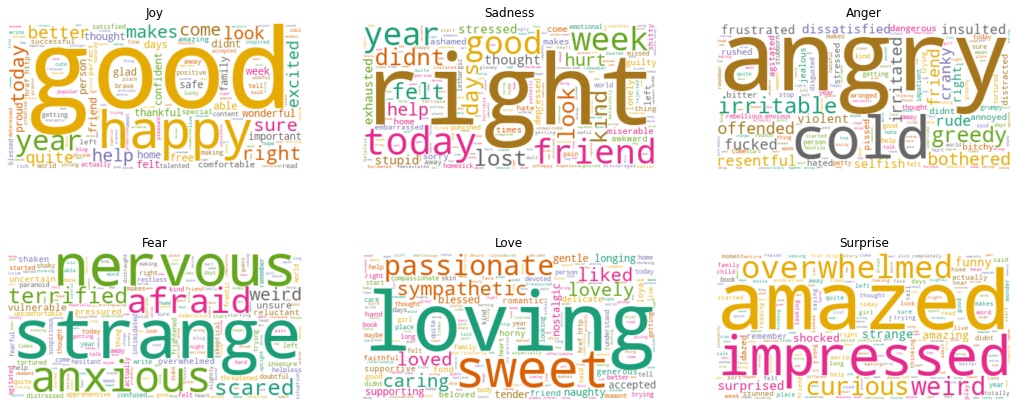

In [275]:
# Reset the output Dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18,12]

full_emotions = ["Joy", "Sadness", "Anger", "Fear", "Love", "Surprise"]

# Create subplots for each emotion
for index, emotion in enumerate(df_dtm_transpose.columns):
    wordcloud_emotions.generate(df_combine.combine_reviews[emotion])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wordcloud_emotions, interpolation='bilinear')
    plt.axis('off')
    plt.title(full_emotions[emotion])
    
plt.show()

# SUMMARY

What was our goal for the EDA portion of our journey? To be able to take an initial look at our data and see if the reults of some basic analysis made sense.

My conclusion - yes, it does, for a first pass. These are definitely some things that could be better cleaned up, such as adding more stopwords or including bi-grams / tri-grams. But we can save that for another day.

As a reminder, the data science process is an interactive one. It's better to see some non-perfect but acceptable results to help you quickly decide wheter your project is a dud or not. Instead of having analysis paralysis and never deliver anything.

Motto: Let go of perfectionism!!!

## AGAIN: CHECKING THE TOP TEN WORDS USING: FREQDIST()

In [276]:
freq =nltk.FreqDist(word_tokens)
df_freq = pd.DataFrame({'Words': list(freq.keys()),
                       'Count': list(freq.values())})
df_freq = df_freq.sort_values("Count", ascending = False).head(10)
df_freq

Words  Count
1       feel  12577
3    feeling   5758
37      like   3281
91    really   1060
19      know    955
66      time    894
23    little    831
160   people    750
213    would    721
232     want    716

In [277]:
df_clean

Review  Emotion Source  \
0                                i didnt feel humiliated  sadness  train   
1      i can go from feeling so hopeless to so damned...  sadness  train   
2       im grabbing a minute to post i feel greedy wrong    anger  train   
3      i am ever feeling nostalgic about the fireplac...     love  train   
4                                   i am feeling grouchy    anger  train   
...                                                  ...      ...    ...   
17995  i just keep feeling like someone is being unki...    anger   test   
17996  im feeling a little cranky negative after this...    anger   test   
17997  i feel that i am useful to my people and that ...      joy   test   
17998  im feeling more comfortable with derby i feel ...      joy   test   
17999  i feel all weird when i have to meet w people ...     fear   test   

                                            Clean_Review  
0                                  didnt feel humiliated  
1      feeling hopeless damned hopeful around someone...  
2                 grabbing minute post feel greedy wrong  
3      ever feeling nostalgic fireplace know still pr...  
4                                        feeling grouchy  
...                                                  ...  
17995  keep feeling like someone unkind wrong think b...  
17996  feeling little cranky negative doctors appoint...  
17997  feel useful people gives great feeling achieve...  
17998  feeling comfortable derby feel though start st...  
17999  feel weird meet people text like dont talk fac...  

[18000 rows x 4 columns]

In [278]:
df_clean['Emotion'].value_counts()

joy         6057
sadness     5247
anger       2434
fear        2161
love        1463
surprise     638
Name: Emotion, dtype: int64

## CONTINUE DATA NLP PRE-PROCESSING WITH STEMMING AND LEMMATIZATION

In [279]:
#stop_words = set(stopwords.words('english'))
stop_words3 = text.ENGLISH_STOP_WORDS.union(add_stopwords)

df_stopwords3 = df_tokenize.apply(lambda sentence: [word for word in sentence if word not in stop_words3])

df_stopwords3.head()

0                                [didnt, humiliated]
1    [hopeless, damned, hopeful, just, cares, awake]
2            [grabbing, minute, post, greedy, wrong]
3                   [nostalgic, fireplace, property]
4                                          [grouchy]
Name: Clean_Review, dtype: object

## 1. STEMMING

In [280]:
# stemming words means narrowing the single word
# the process is almost similar as label encoding
# for each word in a sentence, we are going to stem that word

from nltk.stem import PorterStemmer
#from nltk.stem import LancasterStemmer 
#from nltk.stem import SnowballStemmer   

stemmer = PorterStemmer()
#snowball = SnowballStemmer()
#lancaster = LancasterStemmer()
df_stemmer = df_stopwords3.apply(lambda sentence: [stemmer.stem(allwords) for allwords in sentence])  
df_stemmer.head()


0                             [didnt, humili]
1    [hopeless, damn, hope, just, care, awak]
2          [grab, minut, post, greedi, wrong]
3               [nostalg, fireplac, properti]
4                                   [grouchi]
Name: Clean_Review, dtype: object

In [281]:
len(df_stemmer) 

18000

## 2. LEMMATIZATION

In [282]:
from nltk.stem import WordNetLemmatizer

word_lemma = WordNetLemmatizer()

df_lemmatizer = df_stemmer.apply(lambda sentence: [word_lemma.lemmatize(word) for word in sentence])
df_lemmatizer.head()

0                             [didnt, humili]
1    [hopeless, damn, hope, just, care, awak]
2          [grab, minut, post, greedi, wrong]
3               [nostalg, fireplac, properti]
4                                   [grouchi]
Name: Clean_Review, dtype: object

In [283]:
len(df_lemmatizer)

18000

## 3. COMBINING THE PRE-PROCESS WORDS

In [284]:
df_clean_final =df_clean.copy()

In [285]:
for i in range (len(df_lemmatizer)):
    df_lemmatizer[i] = " ".join(df_lemmatizer[i])   # this line will combine all individual words into a single sentence
    
df_clean_final['Clean_Review'] = df_lemmatizer               #  Combine them in the clean_review
df_clean_final.head()

Review  Emotion Source  \
0                            i didnt feel humiliated  sadness  train   
1  i can go from feeling so hopeless to so damned...  sadness  train   
2   im grabbing a minute to post i feel greedy wrong    anger  train   
3  i am ever feeling nostalgic about the fireplac...     love  train   
4                               i am feeling grouchy    anger  train   

                        Clean_Review  
0                       didnt humili  
1  hopeless damn hope just care awak  
2       grab minut post greedi wrong  
3          nostalg fireplac properti  
4                            grouchi

## TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY (TF-IDF) / BAG OF WORDS
    
    TF-IDF is much more preferred than Bag-Of-Words, in which every word, is represented as 1 or 0, every time it gets appeared in each Sentence, while, in TF-IDF, gives weightage to each Word separately, which in turn defines the importance of each word than others.

In [286]:
X_clean_train = df_clean_final[df_clean_final['Source']=='train']
y_clean_test = df_clean_final[df_clean_final['Source']=='test']

X_clean_train.shape,y_clean_test.shape

((16000, 4), (2000, 4))

### TF-IDF TECHNIQUE CONVERTING CORPUS TO X

Here, we are covering the Unigram, Bi-gram, and Tri-gram for the range.

In [287]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=12000, ngram_range=(1,3), analyzer='word')

## 1. DEFINING X & y VARIABLES

In [288]:
X = tfidf.fit_transform(X_clean_train['Clean_Review'])
y = X_clean_train['Emotion']

In [289]:
X.shape, y.shape

((16000, 12000), (16000,))

In [290]:
tfidf = tfidf.vocabulary_
tfidf

{'didnt': 2030,
 'humili': 4086,
 'didnt humili': 2047,
 'hopeless': 4017,
 'damn': 1795,
 'hope': 3987,
 'just': 4463,
 'care': 1088,
 'awak': 506,
 'hope just': 4003,
 'just care': 4490,
 'grab': 3422,
 'minut': 5563,
 'post': 6464,
 'greedi': 3466,
 'wrong': 11889,
 'minut post': 5566,
 'nostalg': 5876,
 'fireplac': 2932,
 'properti': 7232,
 'grouchi': 3495,
 'burden': 1007,
 'late': 4874,
 'wasnt': 11531,
 'sure': 10397,
 'wasnt sure': 11539,
 'take': 10512,
 'time': 10822,
 'recommend': 8162,
 'fallen': 2762,
 'asleep': 440,
 'faster': 2799,
 'funni': 3160,
 'fallen asleep': 2763,
 'confus': 1539,
 'teenag': 10609,
 'jade': 4398,
 'year': 11911,
 'petrona': 6285,
 'perform': 6226,
 'huge': 4077,
 'profit': 6975,
 'romant': 8452,
 'suffer': 10313,
 'see': 9388,
 'mean': 5442,
 'run': 8679,
 'divin': 2178,
 'experi': 2649,
 'expect': 2647,
 'type': 11131,
 'spiritu': 9943,
 'encount': 2471,
 'run divin': 8707,
 'run divin experi': 8708,
 'easiest': 2379,
 'dissatisfi': 2152,
 'energ

# MODEL BUILDING

In [291]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# MODEL 1 - LOGISTIC REGRESSION

## TRAIN AND TEST SPLIT

In [292]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr =  train_test_split(X, y, random_state=0, test_size= .20)

In [293]:
from sklearn.model_selection import train_test_split

X_train_lr.shape, y_train_lr.shape

((12800, 12000), (12800,))

In [294]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() 
                        
lr.fit(X_train_lr, y_train_lr)

LogisticRegression()

In [295]:
parameters = {"multi_class": ['multinomial','ovr'],
              "penalty": ['l1','l2','elasticnet','liblinear'],
              "C" : [1,10,100],
              "class_weight" : ["dict","balanced"],
              "solver" : ['sag', 'saga','newton-cg', 'lgfgs']}            

#parameters = {"penalty":['l1'], "C":[100], "class_weight":['balanced'], "solver":['saga']}

model_lr = GridSearchCV(lr, parameters, cv=2, scoring='accuracy', n_jobs=-1)

model_lr.fit(X_train_lr, y_train_lr)

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'class_weight': ['dict', 'balanced'],
                         'multi_class': ['multinomial', 'ovr'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'liblinear'],
                         'solver': ['sag', 'saga', 'newton-cg', 'lgfgs']},
             scoring='accuracy')

In [296]:
print(model_lr.best_params_)

{'C': 10, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}


In [297]:
model_lr.best_score_

0.8424218750000001

In [298]:
best_model_lr = model_lr.best_estimator_

In [299]:
best_model_lr.fit(X_train_lr, y_train_lr)

LogisticRegression(C=10, class_weight='balanced', multi_class='multinomial',
                   penalty='l1', solver='saga')

In [300]:
y_pred_lr = best_model_lr.predict(X_test_lr) 

print('Best Accuracy Score is: {:.2f}'.format(accuracy_score(y_test_lr, y_pred_lr)))

Best Accuracy Score is: 0.85


In [301]:
y_pred_lr = best_model_lr.predict(X_test_lr)
y_pred_lr[250]

'sadness'

### Here is a nice overview of the features, their associated coefficients and odds ratios:

In [302]:
coef_lr = pd.DataFrame({'features': X_train_lr, 
                     'coef': lr.coef_[0], 
                     'odds_ratio': np.exp(lr.coef_[0])})

coef_lr[['features', 'coef', 'odds_ratio']].head()

features       coef  odds_ratio
0    (0, 604)\t0.7577832190606751\n  (0, 1959)\t0...  0.3780844   1.4594861
1    (0, 604)\t0.7577832190606751\n  (0, 1959)\t0... -0.1320889   0.8762631
2    (0, 604)\t0.7577832190606751\n  (0, 1959)\t0...  0.1533764   1.1657636
3    (0, 604)\t0.7577832190606751\n  (0, 1959)\t0... -0.2153171   0.8062857
4    (0, 604)\t0.7577832190606751\n  (0, 1959)\t0... -0.0513150   0.9499793

In [303]:
lr.coef_

array([[ 0.37808437, -0.13208893,  0.15337635, ..., -0.15766641,
        -0.09161044, -0.0414678 ],
       [-0.15096954, -0.03195509, -0.06212226, ...,  0.0658992 ,
        -0.13961809, -0.0286129 ],
       [-0.62633298, -0.20509724,  0.12574361, ...,  0.11103878,
        -0.00652477,  0.0021816 ],
       [ 0.02096036, -0.11282018, -0.05650799, ...,  0.28971509,
        -0.09483642,  0.20460554],
       [ 0.4819192 ,  0.52080047, -0.13933698, ..., -0.26317527,
         0.36374518, -0.12553257],
       [-0.1036614 , -0.03883904, -0.02115273, ..., -0.04581138,
        -0.03115545, -0.01117388]])

In [304]:
lr.intercept_

array([-0.01144844, -0.14574067,  1.15855724, -0.51752199,  0.93198157,
       -1.41582771])

## MODEL EVALUATION AND PREDICTION

### 1. CONFUSION MATRIX
To evaluate classification models

In [305]:
from sklearn.metrics import confusion_matrix

confusion_matrix_lr = confusion_matrix(y_test_lr, y_pred_lr)
print(confusion_matrix_lr)

[[385   4  20   6  42   2]
 [ 24 298  21   4  28  22]
 [ 15  10 921  51  42  14]
 [  8   2  43 207  10   1]
 [ 26  17  44   9 804   5]
 [  0   7   5   1   2 100]]


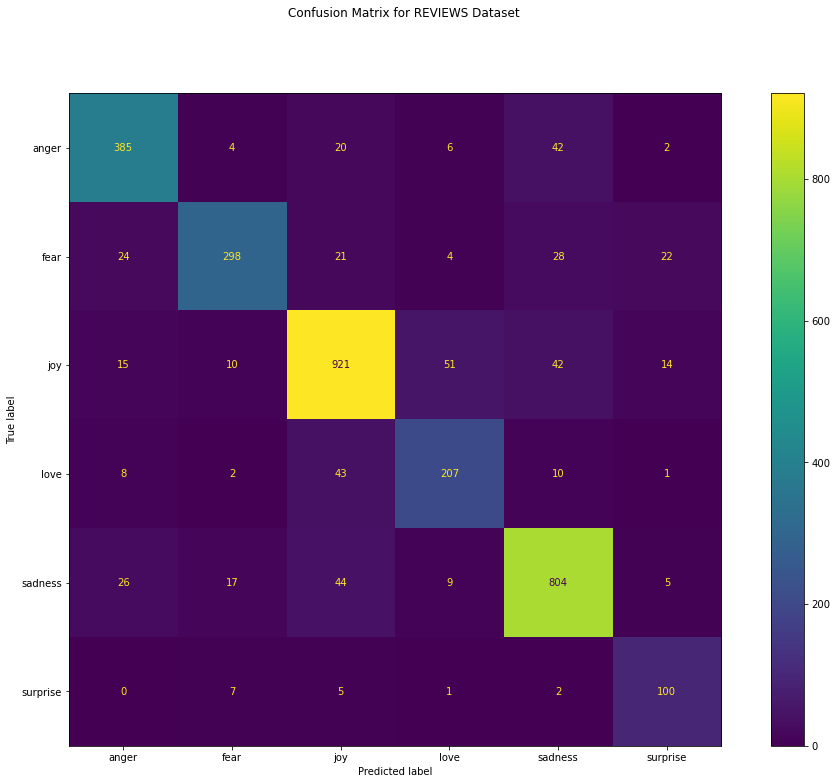

In [306]:
fig = plot_confusion_matrix(best_model_lr, X_test_lr, y_test_lr, display_labels=lr.classes_)
fig.figure_.suptitle("Confusion Matrix for REVIEWS Dataset")
plt.show()

### But what does the confusion matrix tell us?
TRUE POSITIVES (TP) = are the cases in which we predicted "no", they do no have stroke and in reality, they do not have stroke.

TRUE NEGATIVES (TN) = are the cases in which we predicted "yes" they have stroke and in reality, they have stroke.

FALSE POSITIVES (FP) = are the cases in which we predicted "no", they do not have stroke and in reality, they do have stroke. This is also known as Type 1 Error.

FALSE NEGATIVES (FN) = are the cases in which we predicted "yes" they have stroke and in reality, they do not have stroke. This is also known as the Type 2 Error.

## 2. FURTHER METRICS
Based on the confusion matrix, the following can be calculated:

Accuracy is the fraction of predictions our model got right.

Error rate is the fraction of predictions our model got wrong.

The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is intuitively the ability of the classifier to find all the positive samples.

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In [307]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_acs_lr = accuracy_score(y_test_lr, y_pred_lr)
model_er_lr = (1 - model_acs_lr)
model_prec_lr = precision_score(y_test_lr, y_pred_lr, average=None)
model_rec_lr = recall_score(y_test_lr, y_pred_lr, average=None)
model_f1_lr = f1_score(y_test_lr, y_pred_lr, average=None)

model_prec_lr_mic = precision_score(y_test_lr, y_pred_lr, average='micro')
model_rec_lr_mic  = recall_score(y_test_lr, y_pred_lr, average='micro')
model_f1_lr_mic   = f1_score(y_test_lr, y_pred_lr, average='micro')

model_prec_lr_mac = precision_score(y_test_lr, y_pred_lr, average='macro')
model_rec_lr_mac  = recall_score(y_test_lr, y_pred_lr, average='macro')
model_f1_lr_mac   = f1_score(y_test_lr, y_pred_lr, average='macro')

model_prec_lr_wei = precision_score(y_test_lr, y_pred_lr, average='weighted')
model_rec_lr_wei  = recall_score(y_test_lr, y_pred_lr, average='weighted')
model_f1_lr_wei   = f1_score(y_test_lr, y_pred_lr, average='weighted')

print('\nAccuracy Score: {:.2f}\n'.format(model_acs_lr))
print('\nThe Error Rate is: {:.2f}'.format(model_er_lr))

print("\nThe Precision Scores are: ", model_prec_lr)
print("The Recall Scores are:    ", model_rec_lr)
print("The F_1 Scores are:       ", model_f1_lr)

print('\nMicro Precision: {:.2f}'.format(model_prec_lr_mic))
print('Micro Recall: {:.2f}'.format(model_rec_lr_mic))
print('Micro F1-score: {:.2f}\n'.format(model_f1_lr_mic))

print('Macro Precision: {:.2f}'.format(model_prec_lr_mac))
print('Macro Recall: {:.2f}'.format(model_rec_lr_mac))
print('Macro F1-score: {:.2f}\n'.format(model_f1_lr_mac))
      
print('Weighted Precision: {:.2f}'.format(model_prec_lr_wei))
print('Weighted Recall: {:.2f}'.format(model_rec_lr_wei))
print('Weighted F1-score: {:.2f}\n'.format(model_f1_lr_wei))


Accuracy Score: 0.85


The Error Rate is: 0.15

The Precision Scores are:  [0.84061135 0.8816568  0.87381404 0.74460432 0.86637931 0.69444444]
The Recall Scores are:     [0.83877996 0.75062972 0.87464387 0.76383764 0.88839779 0.86956522]
The F_1 Scores are:        [0.83969466 0.81088435 0.87422876 0.75409836 0.87725041 0.77220077]

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.82
Macro Recall: 0.83
Macro F1-score: 0.82

Weighted Precision: 0.85
Weighted Recall: 0.85
Weighted F1-score: 0.85



## 3. CLASSIFICATION REPORT

In [308]:
# Note the class is in order
from sklearn.metrics import classification_report

class_report_lr = (classification_report(y_test_lr, y_pred_lr, target_names=['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']))
print('\nCLASSIFICATION REPORT\n', class_report_lr)
#or
#print(classification_report(y_test_lr, y_pred_lr))


CLASSIFICATION REPORT
               precision    recall  f1-score   support

       anger       0.84      0.84      0.84       459
        fear       0.88      0.75      0.81       397
         joy       0.87      0.87      0.87      1053
        love       0.74      0.76      0.75       271
     sadness       0.87      0.89      0.88       905
    surprise       0.69      0.87      0.77       115

    accuracy                           0.85      3200
   macro avg       0.82      0.83      0.82      3200
weighted avg       0.85      0.85      0.85      3200



## 4. ROC / AUC

### The receiver operating characteristic (ROC) curve
is another common tool used with binary classifiers. It shows the tradeoff between sensitivity and specificity. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible. This means that the top left corner of the chart is the “ideal” point - a false positive rate of zero and a true positive rate of one. This is not very realistic, but it means that a larger area under the curve (AUC) is usually better

### AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

## 5. CROSS VALIDATION
Another option for model evaluation is the use of Cross Validation (CV).

With CV we try to validate the stability of the machine learning model-how well it would generalize to new data. It needs to be sure that the model has got most of the patterns from the data correct, and its not picking up too much on the noise, or in other words its low on bias and variance.

In [309]:
lr = LogisticRegression()
cv_scores_lr = cross_val_score(lr, X_train_lr, y_train_lr, cv=5)
print(cv_scores_lr )
print("The Cross Validation Score is: ",cv_scores_lr .mean())

[0.81445312 0.80507812 0.80585938 0.80742187 0.80507812]
The Cross Validation Score is:  0.807578125


## 6. ACCURACY SCORE (Test)

In [310]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_lr, y_pred_lr)))

Accuracy: 0.85


## 7. CONCLUSION
The logistic regression is not one of the most complex of its kind, it is often used because of its simplicity and delivers very satisfactory values. Based on the results, with Accuracy Score = 0.85 and a cross validation score = 0.81, we can check the best fit model after we gather and test all the right models. The best parameters are {'C': 10, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}.

# MODEL 2 - SUPPORT VECTOR MACHINE (SVC)
Support vector machine is another simple algorithm that every machine learning expert should have in his/her arsenal. Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks.

## TRAIN AND TEST SPLIT


In [374]:
from sklearn.model_selection import train_test_split

X_train_svc, X_test_svc,y_train_svc,y_test_svc = train_test_split(X, y, random_state=9, test_size=0.2)

## CREATE AND FIT A MODEL

In [375]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_svc, y_train_svc)

SVC()

## BEST PARAMETER (Hyper-Parameter Tuning)

In [376]:
parameters_svc = {"kernel": ["linear", "poly", "rbf", "sigmoid"],                
                 "C": [1,10],
                 "gamma":[1e-7, 1e-4],                            # 'scale'              
                 "class_weight":['balanced'],                     # 'dict','balanced'         
                 "degree": [1,3],
                 "decision_function_shape": ['ovr']}
                                                                  #"decision_function_shape": ["ovo","ovr"]}

#parameters_svc = {'C': 10, 'class_weight': 'balanced', 'degree': 1, 'gamma': 1e-07, 'kernel': 'linear'}     
    
model_svc = GridSearchCV(svc,param_grid=parameters_svc, cv=2, scoring="accuracy", n_jobs=-1)


In [377]:
model_svc.fit(X_train_svc, y_train_svc)

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'class_weight': ['balanced'],
                         'decision_function_shape': ['ovr'], 'degree': [1, 3],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [378]:
print(model_svc.best_params_)

{'C': 1, 'class_weight': 'balanced', 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 1e-07, 'kernel': 'linear'}


In [379]:
model_svc.best_score_

0.8180468750000001

In [381]:
best_model_svc = model_svc.best_estimator_

In [382]:
best_model_svc.fit(X_train_svc, y_train_svc)

SVC(C=1, class_weight='balanced', degree=1, gamma=1e-07, kernel='linear')

In [383]:
print("Best Model Accuracy Score is: {:.2f}". format(best_model_svc.score(X_test_svc,y_test_svc)))

Best Model Accuracy Score is: 0.83


In [384]:
y_pred_svc = model_svc.predict(X_test_svc) 

print('Best Accuracy Score is: {:.2f}'.format(accuracy_score(y_test_svc, y_pred_svc)))

Best Accuracy Score is: 0.83


## MODEL EVALUATION AND PREDICTION

## 1. CONFUSION MATRIX
To evaluate classification models

In [385]:
from sklearn.metrics import confusion_matrix

confusion_matrix_svc = confusion_matrix(y_test_svc, y_pred_svc)
print(confusion_matrix_svc)

[[338  24  19  11  26   2]
 [ 13 315  22   7  10  24]
 [ 16  12 878 107  32  16]
 [  5   2  24 212   2   1]
 [ 38  35  57  17 797   4]
 [  3  18   7   1   3 102]]


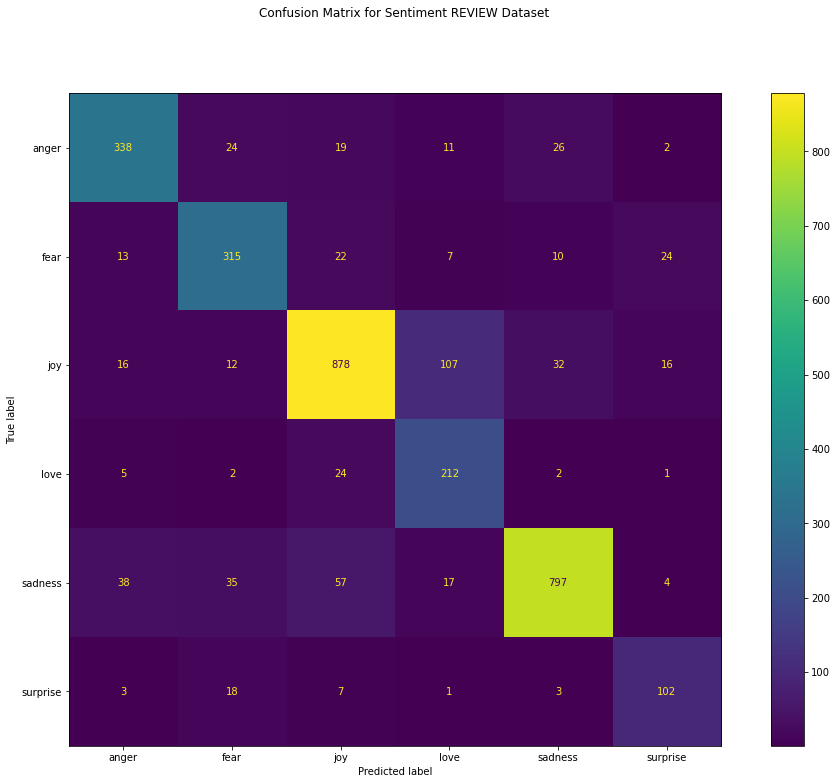

In [386]:
fig = plot_confusion_matrix(best_model_svc, X_test_svc, y_test_svc, display_labels=best_model_svc.classes_)
fig.figure_.suptitle("Confusion Matrix for Sentiment REVIEW Dataset")
plt.show()

## 2. FURTHER METRICS

In [387]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_acs_svc = accuracy_score(y_test_svc, y_pred_svc)
model_er_svc = (1 - model_acs_svc)
model_prec_svc = precision_score(y_test_svc, y_pred_svc, average=None)
model_rec_svc = recall_score(y_test_svc, y_pred_svc, average=None)
model_f1_svc = f1_score(y_test_svc, y_pred_svc, average=None)

model_prec_svc_mic = precision_score(y_test_svc, y_pred_svc, average='micro')
model_rec_svc_mic  = recall_score(y_test_svc, y_pred_svc, average='micro')
model_f1_svc_mic   = f1_score(y_test_svc, y_pred_svc, average='micro')

model_prec_svc_mac = precision_score(y_test_svc, y_pred_svc, average='macro')
model_rec_svc_mac  = recall_score(y_test_svc, y_pred_svc, average='macro')
model_f1_svc_mac   = f1_score(y_test_svc, y_pred_svc, average='macro')

model_prec_svc_wei = precision_score(y_test_svc, y_pred_svc, average='weighted')
model_rec_svc_wei  = recall_score(y_test_svc, y_pred_svc, average='weighted')
model_f1_svc_wei   = f1_score(y_test_svc, y_pred_svc, average='weighted')

print('\nAccuracy Score: {:.2f}\n'.format(model_acs_svc))
print('\nThe Error Rate is: {:.2f}'.format(model_er_svc))

print("\nThe Precision Scores are: ", model_prec_svc)
print("The Recall Scores are:    ", model_rec_svc)
print("The F_1 Scores are:       ", model_f1_svc)

print('\nMicro Precision: {:.2f}'.format(model_prec_svc_mic))
print('Micro Recall: {:.2f}'.format(model_rec_svc_mic))
print('Micro F1-score: {:.2f}\n'.format(model_f1_svc_mic))

print('Macro Precision: {:.2f}'.format(model_prec_svc_mac))
print('Macro Recall: {:.2f}'.format(model_rec_svc_mac))
print('Macro F1-score: {:.2f}\n'.format(model_f1_svc_mac))
      
print('Weighted Precision: {:.2f}'.format(model_prec_svc_wei))
print('Weighted Recall: {:.2f}'.format(model_rec_svc_wei))
print('Weighted F1-score: {:.2f}\n'.format(model_f1_svc_wei))


Accuracy Score: 0.83


The Error Rate is: 0.17

The Precision Scores are:  [0.81840194 0.77586207 0.87189672 0.5971831  0.91609195 0.68456376]
The Recall Scores are:     [0.8047619  0.8056266  0.82752121 0.86178862 0.8407173  0.76119403]
The F_1 Scores are:        [0.81152461 0.79046424 0.84912959 0.70549085 0.87678768 0.72084806]

Micro Precision: 0.83
Micro Recall: 0.83
Micro F1-score: 0.83

Macro Precision: 0.78
Macro Recall: 0.82
Macro F1-score: 0.79

Weighted Precision: 0.84
Weighted Recall: 0.83
Weighted F1-score: 0.83



## 3. CLASSIFICATION REPORT

In [388]:
from sklearn.metrics import classification_report

#class_report_svc = (classification_report(y_test_svc, y_pred_svc, target_names=['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']))
#or

class_report_svc = (classification_report(y_test_svc, y_pred_svc))
print('\nCLASSIFICATION REPORT\n', class_report_svc)


CLASSIFICATION REPORT
               precision    recall  f1-score   support

       anger       0.82      0.80      0.81       420
        fear       0.78      0.81      0.79       391
         joy       0.87      0.83      0.85      1061
        love       0.60      0.86      0.71       246
     sadness       0.92      0.84      0.88       948
    surprise       0.68      0.76      0.72       134

    accuracy                           0.83      3200
   macro avg       0.78      0.82      0.79      3200
weighted avg       0.84      0.83      0.83      3200



## 4. CROSS VALIDATION

In [389]:
from sklearn.model_selection import cross_val_score

cv_scores_svc = cross_val_score(best_model_svc, X_train_svc, y_train_svc, cv=5)
print(cv_scores_svc)
print("The Cross Validation Score is: {:.2f}".format(cv_scores_svc.mean()))

[0.82421875 0.82109375 0.83085937 0.82851562 0.84257812]
The Cross Validation Score is: 0.83


## 5. ACCURACY SCORE (Test)

In [390]:
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test_svc, y_pred_svc)))

Accuracy Score: 0.83


## 6. CONCLUSION:
The best parameters are found in {'C': 1, 'class_weight': 'balanced', 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 1e-07, 'kernel': 'linear'}. Based on the results, with Accuracy Score = 0.83 and a cross validation score = 0.83, we can check the best fit model after we gather and test all the right models.

# MODEL 3 - STOCHASTIC GRADIENT DESCENT CLASSIFIER (OPTIMIZER)
The name Stochastic Gradient Descent - Classifier (SGD-Classifier) might mislead some user to think that SGD is a classifier. But that’s not the case! SGD Classifier is a linear classifier (SVM, logistic regression, a.o.) optimized by the SGD. These are two different concepts. While SGD is a optimization method, Logistic Regression or linear Support Vector Machine is a machine learning algorithm/model.

## TRAIN AND TEST SPLIT

In [391]:
from sklearn.model_selection import train_test_split

X_train_sgd, X_test_sgd, y_train_sgd, y_test_sgd = train_test_split(X, y, random_state=10, test_size=0.2)

### It is particularly important to scale the features when using the SGD Classifier

## CHECKING THE LOSS

In [392]:
#Gradient descent can used in different models depending 
from sklearn.linear_model import SGDClassifier

svm    = SGDClassifier(loss='hinge')
logreg = SGDClassifier(loss='log'  )

In [393]:
print("SVMClassifier's 4-fold score:  ", cross_val_score(svm   ,X_train_sgd,y_train_sgd,cv=4).mean())
print("LogRegression's 4-fold score:  ", cross_val_score(logreg,X_train_sgd,y_train_sgd,cv=4).mean())

SVMClassifier's 4-fold score:   0.846171875
LogRegression's 4-fold score:   0.80234375


## CREATE AND FIT A MODEL

In [394]:
sgd = SGDClassifier()
sgd.fit(X_train_sgd, y_train_sgd)

SGDClassifier()

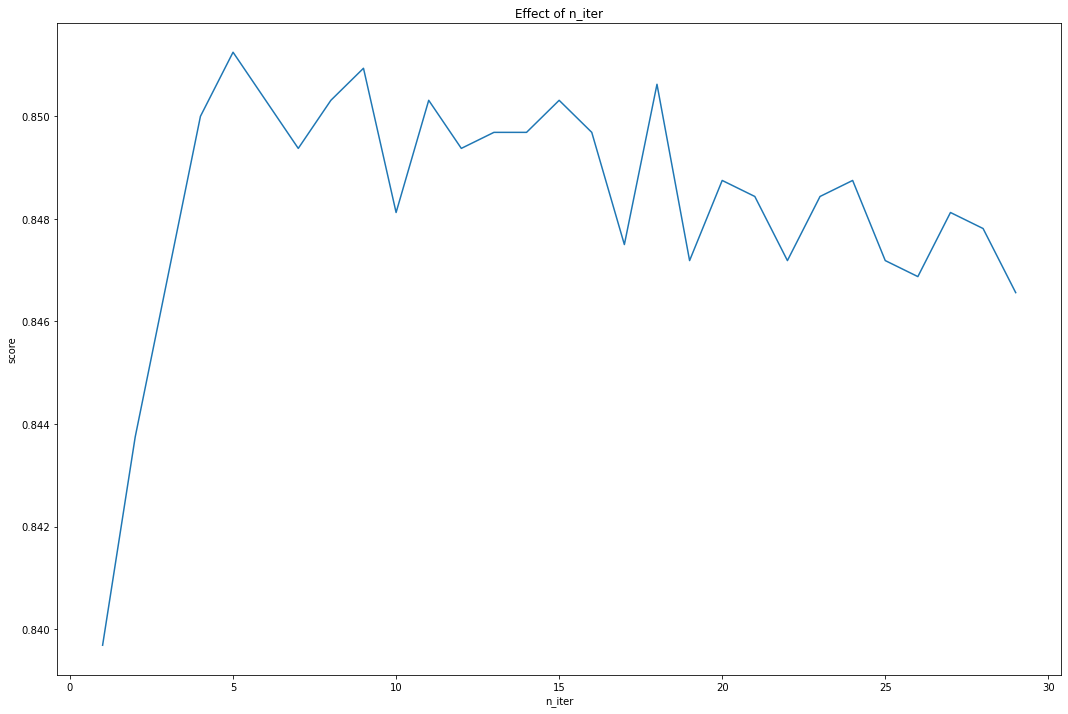

In [395]:
n_iters = list(range(1,30,1))

scores = []
for n_iter in n_iters:
    sgd = SGDClassifier(max_iter=n_iter)
    sgd.fit(X_train_sgd, y_train_sgd)
    scores.append(sgd.score(X_test_sgd, y_test_sgd))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

## BEST PARAMETER (Hyper-Parameter Tuning)

In [396]:
# params = parameters
# penalty, alpha, and l1_ratio = all related with regularisation
# related with learning_rate

parameters_sgd = {
            "loss"   : ["hinge", "log"],                                        #, "perceptron"
            "penalty": ["l2", "l1", "elasticnet"] ,               
            "alpha"  : [0.0001, 1],           
            "l1_ratio": [0, 1],                  
            "learning_rate": ["constant", "invscaling", "optimal", "adaptive"],   
            "eta0"   : [0.1, 1.0],
            "class_weight" : ['balanced'],
            "power_t": [0.5,1],
            "max_iter":[5]
        }

model_sgd = GridSearchCV(SGDClassifier(random_state=7), parameters_sgd, cv=3, n_jobs=-1)    # you can declare penalty inside SGDClassifier if you only need one class like elasticnet

In [397]:
model_sgd.fit (X_train_sgd, y_train_sgd)

GridSearchCV(cv=3, estimator=SGDClassifier(random_state=7), n_jobs=-1,
             param_grid={'alpha': [0.0001, 1], 'class_weight': ['balanced'],
                         'eta0': [0.1, 1.0], 'l1_ratio': [0, 1],
                         'learning_rate': ['constant', 'invscaling', 'optimal',
                                           'adaptive'],
                         'loss': ['hinge', 'log'], 'max_iter': [5],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'power_t': [0.5, 1]})

In [398]:
model_sgd.best_params_

{'alpha': 0.0001,
 'class_weight': 'balanced',
 'eta0': 1.0,
 'l1_ratio': 0,
 'learning_rate': 'constant',
 'loss': 'hinge',
 'max_iter': 5,
 'penalty': 'l1',
 'power_t': 0.5}

In [399]:
print(model_sgd.best_params_)

{'alpha': 0.0001, 'class_weight': 'balanced', 'eta0': 1.0, 'l1_ratio': 0, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 5, 'penalty': 'l1', 'power_t': 0.5}


In [400]:
model_sgd.best_score_

0.849921622904153

In [401]:
best_model_sgd = model_sgd.best_estimator_

In [402]:
best_model_sgd.fit(X_train_sgd, y_train_sgd)

SGDClassifier(class_weight='balanced', eta0=1.0, l1_ratio=0,
              learning_rate='constant', max_iter=5, penalty='l1',
              random_state=7)

In [403]:
print("Best Model Accuracy Score is: {:.2f}". format(best_model_sgd.score(X_test_sgd,y_test_sgd)))

Best Model Accuracy Score is: 0.85


In [404]:
y_pred_sgd = best_model_sgd.predict(X_test_sgd) 

print('Best Accuracy Score is: {:.2f}'.format(accuracy_score(y_test_sgd, y_pred_sgd)))

Best Accuracy Score is: 0.85


In [405]:
y_pred_sgd = best_model_sgd.predict(X_test_sgd)
y_pred_sgd[2300]

'anger'

## MODEL EVALUATION AND PREDICTION

## 1. CONFUSION MATRIX
To evaluate classification models

In [346]:
from sklearn.metrics import confusion_matrix

confusion_matrix_sgd = confusion_matrix(y_test_sgd, y_pred_sgd)
print(confusion_matrix_sgd)

[[374  13  21   6  15   1]
 [ 12 327  20   3   9  20]
 [ 21  11 891  99  25  23]
 [  6   4  18 218   3   0]
 [ 47  24  51  10 805   7]
 [  1  13   0   1   2  99]]


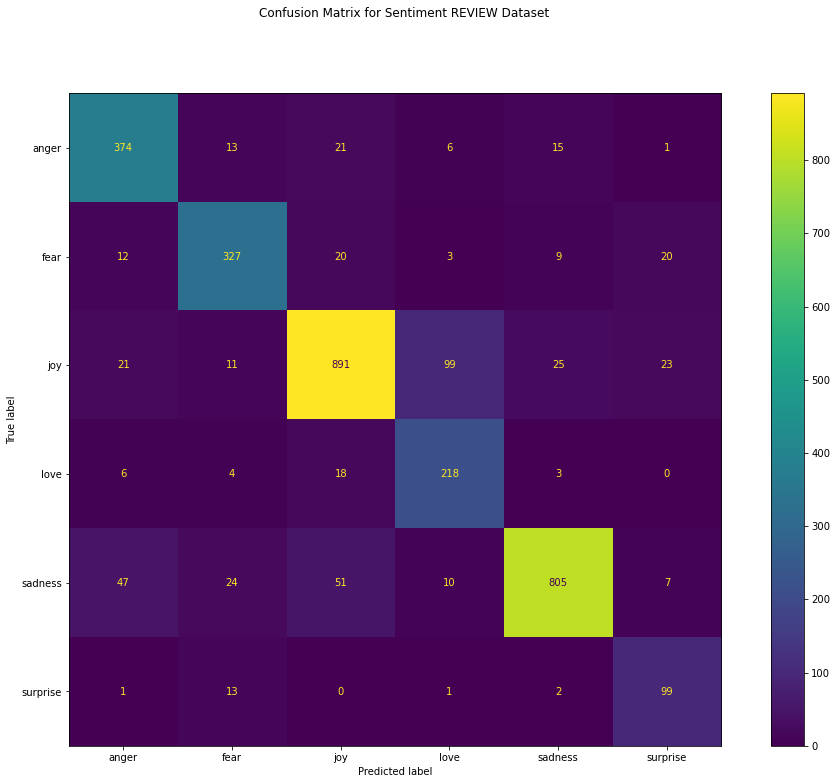

In [347]:
fig = plot_confusion_matrix(best_model_sgd, X_test_sgd, y_test_sgd, display_labels=best_model_sgd.classes_)
fig.figure_.suptitle("Confusion Matrix for Sentiment REVIEW Dataset")
plt.show()

## 2. FURTHER METRICS

In [348]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_acs_sgd  = accuracy_score(y_test_sgd, y_pred_sgd)
model_er_sgd   = (1 - model_acs_sgd)
model_prec_sgd = precision_score(y_test_sgd, y_pred_sgd, average=None)
model_rec_sgd  = recall_score(y_test_sgd, y_pred_sgd, average=None)
model_f1_sgd   = f1_score(y_test_sgd, y_pred_sgd, average=None)

model_prec_sgd_mic = precision_score(y_test_sgd, y_pred_sgd, average='micro')
model_rec_sgd_mic  = recall_score(y_test_sgd, y_pred_sgd, average='micro')
model_f1_sgd_mic   = f1_score(y_test_sgd, y_pred_sgd, average='micro')

model_prec_sgd_mac = precision_score(y_test_sgd, y_pred_sgd, average='macro')
model_rec_sgd_mac  = recall_score(y_test_sgd, y_pred_sgd, average='macro')
model_f1_sgd_mac   = f1_score(y_test_sgd, y_pred_sgd, average='macro')

model_prec_sgd_wei = precision_score(y_test_sgd, y_pred_sgd, average='weighted')
model_rec_sgd_wei  = recall_score(y_test_sgd, y_pred_sgd, average='weighted')
model_f1_sgd_wei   = f1_score(y_test_sgd, y_pred_sgd, average='weighted')

print('\nAccuracy Score: {:.2f}\n'.format(model_acs_sgd))
print('\nThe Error Rate is: {:.2f}'.format(model_er_sgd))

print("\nThe Precision Scores are: ", model_prec_sgd)
print("The Recall Scores are:    ", model_rec_sgd)
print("The F_1 Scores are:       ", model_f1_sgd)

print('\nMicro Precision: {:.2f}'.format(model_prec_sgd_mic))
print('Micro Recall: {:.2f}'.format(model_rec_sgd_mic))
print('Micro F1-score: {:.2f}\n'.format(model_f1_sgd_mic))

print('Macro Precision: {:.2f}'.format(model_prec_sgd_mac))
print('Macro Recall: {:.2f}'.format(model_rec_sgd_mac))
print('Macro F1-score: {:.2f}\n'.format(model_f1_sgd_mac))
      
print('Weighted Precision: {:.2f}'.format(model_prec_sgd_wei))
print('Weighted Recall: {:.2f}'.format(model_rec_sgd_wei))
print('Weighted F1-score: {:.2f}\n'.format(model_f1_sgd_wei))


Accuracy Score: 0.85


The Error Rate is: 0.15

The Precision Scores are:  [0.81127983 0.83418367 0.89010989 0.64688427 0.9371362  0.66      ]
The Recall Scores are:     [0.86976744 0.83631714 0.83271028 0.87550201 0.85275424 0.85344828]
The F_1 Scores are:        [0.83950617 0.83524904 0.86045389 0.7440273  0.89295618 0.7443609 ]

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.80
Macro Recall: 0.85
Macro F1-score: 0.82

Weighted Precision: 0.86
Weighted Recall: 0.85
Weighted F1-score: 0.85



## 3. CLASSIFICATION REPORT


In [349]:
from sklearn.metrics import classification_report

print(classification_report(y_test_sgd,y_pred_sgd))

              precision    recall  f1-score   support

       anger       0.81      0.87      0.84       430
        fear       0.83      0.84      0.84       391
         joy       0.89      0.83      0.86      1070
        love       0.65      0.88      0.74       249
     sadness       0.94      0.85      0.89       944
    surprise       0.66      0.85      0.74       116

    accuracy                           0.85      3200
   macro avg       0.80      0.85      0.82      3200
weighted avg       0.86      0.85      0.85      3200



## 4. CROSS VALIDATION

In [350]:
from sklearn.model_selection import cross_val_score

cv_scores_sgd = cross_val_score(best_model_sgd, X_train_sgd, y_train_sgd, cv=5)
print(cv_scores_sgd)
print("The Cross Validation Score is: {:.2f}".format(cv_scores_sgd.mean()))

[0.84375    0.86523438 0.8484375  0.8578125  0.84765625]
The Cross Validation Score is: 0.85


## 5. ACCURACY SCORE (Test)

In [351]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_sgd, y_pred_sgd)))

Accuracy: 0.85


## 6. CONCLUSION:
Based on the results, with Accuracy Score = 0.85 and a cross validation score = 0.85, we can check the best fit model after we gather and test all the right models. The best parameters are found in {'alpha': 0.0001, 'class_weight': 'balanced', 'eta0': 0.1, 'l1_ratio': 0, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 7.5, 'penalty': 'l1', 'power_t': 0.5}.

Furthermore, among the two models ("Logistic Regression and Support Vector Machine), SGD_SVM stand out as the best model.

# MODEL 4 - NAIVE BAYES
The name Stochastic Gradient Descent - Classifier (SGD-Classifier) might mislead some user to think that SGD is a classifier. But that’s not the case! SGD Classifier is a linear classifier (SVM, logistic regression, a.o.) optimized by the SGD. These are two different concepts. While SGD is a optimization method, Logistic Regression or linear Support Vector Machine is a machine learning algorithm/model.

## TRAIN AND TEST SPLIT

In [352]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, random_state=10, test_size=0.2)

## CREATE AND FIT A MODEL

In [353]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_nb, y_train_nb)

MultinomialNB()

## BEST PARAMETER (Hyper-Parameter Tuning)

In [354]:
parameters_nb = {"alpha": [1e-3 ,0.01, .1, 1],
                "fit_prior": ["True", "False"]}
                                                              
#parameters_nb = {'C': 10, 'class_weight': 'balanced', 'degree': 1, 'gamma': 1e-07, 'kernel': 'linear'}     
    
model_nb = GridSearchCV(nb,param_grid=parameters_nb, cv=2, scoring="accuracy", n_jobs=-1)

In [355]:
model_nb.fit (X_train_nb, y_train_nb)

GridSearchCV(cv=2, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'fit_prior': ['True', 'False']},
             scoring='accuracy')

In [356]:
model_nb.best_params_

{'alpha': 0.1, 'fit_prior': 'True'}

In [357]:
print(model_nb.best_params_)

{'alpha': 0.1, 'fit_prior': 'True'}


In [358]:
model_nb.best_score_

0.71171875

In [359]:
best_model_nb = model_nb.best_estimator_

In [360]:
best_model_nb.fit(X_train_nb, y_train_nb)

MultinomialNB(alpha=0.1, fit_prior='True')

In [361]:
print("Best Model Accuracy Score is: {:.2f}". format(best_model_nb.score(X_test_nb,y_test_nb)))

Best Model Accuracy Score is: 0.73


In [362]:
y_pred_nb = model_nb.predict(X_test_nb) 

print('Best Accuracy Score is: {:.2f}'.format(accuracy_score(y_test_nb, y_pred_nb)))

Best Accuracy Score is: 0.73


## MODEL EVALUATION AND PREDICTION

## 1. CONFUSION MATRIX
To evaluate classification models

In [363]:
from sklearn.metrics import confusion_matrix

confusion_matrix_nb = confusion_matrix(y_test_nb, y_pred_nb)
print(confusion_matrix_nb)

[[269  12  65   6  77   1]
 [ 19 236  76   3  54   3]
 [ 17  17 931  21  83   1]
 [  8   8 103 106  24   0]
 [ 28  16 104   6 787   3]
 [  5  18  44   2  24  23]]


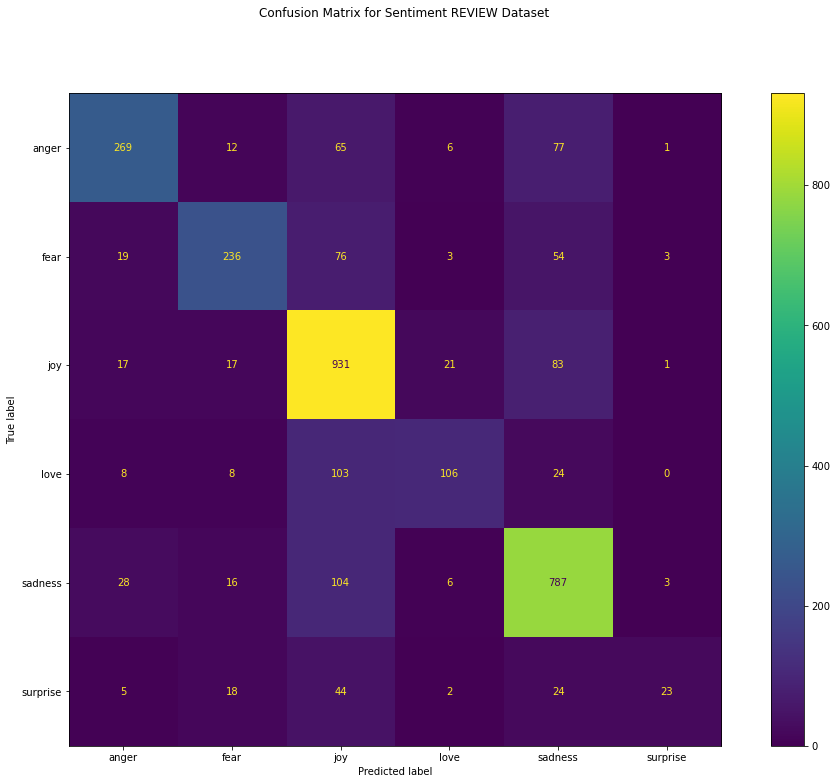

In [364]:
fig = plot_confusion_matrix(best_model_nb, X_test_nb, y_test_nb, display_labels=best_model_nb.classes_)
fig.figure_.suptitle("Confusion Matrix for Sentiment REVIEW Dataset")
plt.show()

## 2. FURTHER METRICS

In [365]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_acs_nb  = accuracy_score(y_test_nb, y_pred_nb)
model_er_nb   = (1 - model_acs_nb)
model_prec_nb = precision_score(y_test_nb, y_pred_nb, average=None)
model_rec_nb  = recall_score(y_test_nb, y_pred_nb, average=None)
model_f1_nb   = f1_score(y_test_nb, y_pred_nb, average=None)

model_prec_nb_mic = precision_score(y_test_nb, y_pred_nb, average='micro')
model_rec_nb_mic  = recall_score(y_test_nb, y_pred_nb, average='micro')
model_f1_nb_mic   = f1_score(y_test_nb, y_pred_nb, average='micro')

model_prec_nb_mac = precision_score(y_test_nb, y_pred_nb, average='macro')
model_rec_nb_mac  = recall_score(y_test_nb, y_pred_nb, average='macro')
model_f1_nb_mac   = f1_score(y_test_nb, y_pred_nb, average='macro')

model_prec_nb_wei = precision_score(y_test_nb, y_pred_nb, average='weighted')
model_rec_nb_wei  = recall_score(y_test_nb, y_pred_nb, average='weighted')
model_f1_nb_wei   = f1_score(y_test_nb, y_pred_nb, average='weighted')

print('\nAccuracy Score: {:.2f}\n'.format(model_acs_nb))
print('\nThe Error Rate is: {:.2f}'.format(model_er_nb))

print("\nThe Precision Scores are: ", model_prec_nb)
print("The Recall Scores are:    ", model_rec_nb)
print("The F_1 Scores are:       ", model_f1_nb)

print('\nMicro Precision: {:.2f}'.format(model_prec_nb_mic))
print('Micro Recall: {:.2f}'.format(model_rec_nb_mic))
print('Micro F1-score: {:.2f}\n'.format(model_f1_nb_mic))

print('Macro Precision: {:.2f}'.format(model_prec_nb_mac))
print('Macro Recall: {:.2f}'.format(model_rec_nb_mac))
print('Macro F1-score: {:.2f}\n'.format(model_f1_nb_mac))
      
print('Weighted Precision: {:.2f}'.format(model_prec_nb_wei))
print('Weighted Recall: {:.2f}'.format(model_rec_nb_wei))
print('Weighted F1-score: {:.2f}\n'.format(model_f1_nb_wei))


Accuracy Score: 0.73


The Error Rate is: 0.27

The Precision Scores are:  [0.77745665 0.76872964 0.7037037  0.73611111 0.75023832 0.74193548]
The Recall Scores are:     [0.6255814  0.60358056 0.87009346 0.42570281 0.83368644 0.19827586]
The F_1 Scores are:        [0.69329897 0.67621777 0.7781028  0.5394402  0.78976417 0.31292517]

Micro Precision: 0.73
Micro Recall: 0.73
Micro F1-score: 0.73

Macro Precision: 0.75
Macro Recall: 0.59
Macro F1-score: 0.63

Weighted Precision: 0.74
Weighted Recall: 0.73
Weighted F1-score: 0.72



## 3. CLASSIFICATION REPORT

In [366]:
from sklearn.metrics import classification_report

print(classification_report(y_test_nb,y_pred_nb))

              precision    recall  f1-score   support

       anger       0.78      0.63      0.69       430
        fear       0.77      0.60      0.68       391
         joy       0.70      0.87      0.78      1070
        love       0.74      0.43      0.54       249
     sadness       0.75      0.83      0.79       944
    surprise       0.74      0.20      0.31       116

    accuracy                           0.73      3200
   macro avg       0.75      0.59      0.63      3200
weighted avg       0.74      0.73      0.72      3200



## 4. CROSS VALIDATION

In [367]:
from sklearn.model_selection import cross_val_score

cv_scores_nb = cross_val_score(best_model_nb, X_train_nb, y_train_nb, cv=5)
print(cv_scores_nb)
print("The Cross Validation Score is: {:.2f}".format(cv_scores_nb.mean()))

[0.72109375 0.73085937 0.71640625 0.73320312 0.721875  ]
The Cross Validation Score is: 0.72


## 5. ACCURACY SCORE (Test)

In [368]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_nb, y_pred_nb)))

Accuracy: 0.73


## 6. CONCLUSION:
Based on the results, with Accuracy Score = 0.80 and a cross validation score = 0.78, we can check the best fit model after we gather and test all the right models. The best parameters are found in {'alpha': 0.0001, 'class_weight': 'balanced', 'eta0': 1.0, 'l1_ratio': 0, 'learning_rate': 'adaptive', 'loss': 'hinge', 'penalty': 'l1', 'power_t': 0.5}.

Furthermore, among the two models ("Logistic Regression and Support Vector Machine), SGD_SVM stand out as the best model.

# SECTION 7: SUMMARY


# 1. OVERVIEW DEFINITION:
Based on the confusion matrix, the following can be calculated:

1. ACCURACY - is the fraction of predictions our model got right.
2. ERROR_RATE - is the fraction of predictions our model got wrong.
3. PRECISION - is intuitively the ability of the classifier to not label a sample as positive if it is negative.
4. RECALL - is intuitively the ability of the classifier to find all the positive samples.
5. F1_SCORE - can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

# 2. OVERVIEW RESULTS:

Average = "Weighted" gives us the highest F1_score, thus we are going to use this in acquiring the best fitted model.

In [406]:
column_names = ["Algorithmus", "Accuracy", "Precision", "Recall", "F1_score"]
df_best_model = pd.DataFrame(columns = column_names)

df_LR = pd.DataFrame([('Logistic_Regression', model_acs_lr, model_prec_lr_wei, model_rec_lr_wei, model_f1_lr_wei)], columns=column_names)
df_best_model = df_best_model.append(df_LR)

df_SVC = pd.DataFrame([('SVM_Classifier', model_acs_svc, model_prec_svc_wei, model_rec_svc_wei, model_f1_svc_wei)], columns=column_names)
df_best_model = df_best_model.append(df_SVC)

df_SGD = pd.DataFrame([('SGD_SVM', model_acs_sgd, model_prec_sgd_wei, model_rec_sgd_wei, model_f1_sgd_wei)], columns=column_names)
df_best_model = df_best_model.append(df_SGD)

df_NB = pd.DataFrame([('NAIVE_BAYES', model_acs_nb, model_prec_nb_wei, model_rec_nb_wei, model_f1_nb_wei)], columns=column_names)
df_best_model = df_best_model.append(df_NB)


df_best_model['Accuracy'] = np.round(df_best_model['Accuracy'], decimals=7)
df_best_model['Precision']= np.round(df_best_model['Precision'], decimals=7)
df_best_model['Recall']   = np.round(df_best_model['Recall'], decimals=7)
df_best_model['F1_score'] = np.round(df_best_model['F1_score'], decimals=7)

#df = df.rename(columns={'R²': 'R'})
#df['R²'] = abs(df.R)
#df = df.drop(columns=['R'])

pd.options.display.float_format = '{:.7f}'.format

df_best_model

Algorithmus  Accuracy  Precision    Recall  F1_score
0  Logistic_Regression 0.8484375  0.8505333 0.8484375 0.8484310
0       SVM_Classifier 0.8256250  0.8372710 0.8256250 0.8288055
0              SGD_SVM 0.8481250  0.8592889 0.8481250 0.8508797
0          NAIVE_BAYES 0.7350000  0.7391949 0.7350000 0.7222647

## 2.1 HIGHEST ACCURACY
ACCURACY - is the fraction of predictions our model got right.

In [407]:
best_Accuracy = df_best_model.sort_values(by='Accuracy', ascending=False)
best_Accuracy

Algorithmus  Accuracy  Precision    Recall  F1_score
0  Logistic_Regression 0.8484375  0.8505333 0.8484375 0.8484310
0              SGD_SVM 0.8481250  0.8592889 0.8481250 0.8508797
0       SVM_Classifier 0.8256250  0.8372710 0.8256250 0.8288055
0          NAIVE_BAYES 0.7350000  0.7391949 0.7350000 0.7222647

## 2.2 HIGHEST PRECISION
PRECISION - is intuitively the ability of the classifier to not label a sample as positive if it is negative.

In [408]:
best_Precision = df_best_model.sort_values(by='Precision', ascending=False)
best_Precision

Algorithmus  Accuracy  Precision    Recall  F1_score
0              SGD_SVM 0.8481250  0.8592889 0.8481250 0.8508797
0  Logistic_Regression 0.8484375  0.8505333 0.8484375 0.8484310
0       SVM_Classifier 0.8256250  0.8372710 0.8256250 0.8288055
0          NAIVE_BAYES 0.7350000  0.7391949 0.7350000 0.7222647

## 2.3 HIGHEST RECALL
RECALL - is intuitively the ability of the classifier to find all the positive samples.

In [409]:
best_Recall = df_best_model.sort_values(by='Recall', ascending=False)
best_Recall

Algorithmus  Accuracy  Precision    Recall  F1_score
0  Logistic_Regression 0.8484375  0.8505333 0.8484375 0.8484310
0              SGD_SVM 0.8481250  0.8592889 0.8481250 0.8508797
0       SVM_Classifier 0.8256250  0.8372710 0.8256250 0.8288055
0          NAIVE_BAYES 0.7350000  0.7391949 0.7350000 0.7222647

## 2.4 HIGHEST f1_SCORE
F1_SCORE - can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In [410]:
best_F1_score = df_best_model.sort_values(by='F1_score', ascending=False)
best_F1_score

Algorithmus  Accuracy  Precision    Recall  F1_score
0              SGD_SVM 0.8481250  0.8592889 0.8481250 0.8508797
0  Logistic_Regression 0.8484375  0.8505333 0.8484375 0.8484310
0       SVM_Classifier 0.8256250  0.8372710 0.8256250 0.8288055
0          NAIVE_BAYES 0.7350000  0.7391949 0.7350000 0.7222647

# 3. OVERVIEW CONCLUSION:
From the overview results, we can see that Stochastic Gradient Descent - Support Vector Machine Classifier (SGD_SVM) has the highest Accuracy Score, Precision, and F1_score.

Therefore, we conclude that it is the best algorithm/model to predict the sentiment analysis of the REVIEW dataset. Next is the Logistic Regression.



### TESTING: This is not final yet

In [411]:
#TF-IDF technique to convert corpus into X
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(df_clean_final.Clean_Review)


TfidfVectorizer()

In [414]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=12000, ngram_range=(1,3), analyzer='word')

x = tfidf.fit_transform(X_clean_train['Clean_Review'])
y = X_clean_train['Emotion']

a = "It is amazing how they handle the situation."
a = clean_text_round1(a)
a = clean_text_round2(a)
b = tfidf.transform([a])
best_model_sgd.predict(b)


array(['joy'], dtype='<U8')